# Importing library

In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords 

In [5]:
df =  pd.read_csv("netflix_titles.csv")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


# Data Exploration

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6131 entries, 0 to 6130
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         6131 non-null   int64 
 1   show_id       6131 non-null   object
 2   type          6131 non-null   object
 3   title         6131 non-null   object
 4   director      5943 non-null   object
 5   cast          5656 non-null   object
 6   country       5691 non-null   object
 7   date_added    6131 non-null   object
 8   release_year  6131 non-null   int64 
 9   rating        6129 non-null   object
 10  duration      6128 non-null   object
 11  listed_in     6131 non-null   object
 12  description   6131 non-null   object
dtypes: int64(2), object(11)
memory usage: 622.8+ KB


In [56]:
#find the nulls value
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [61]:
#find unique value
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [62]:
df = df[df["type"] == "Movie"].reset_index()
netflix = df[["title", "listed_in", "description"]].copy()
netflix.head()

,title,listed_in,description
0,Dick Johnson Is Dead,Documentaries,"As her father nears the end of his life, filmm..."
1,My Little Pony: A New Generation,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,Sankofa,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,The Starling,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,Je Suis Karl,"Dramas, International Movies",After most of her family is murdered in a terr...


# Data Cleaning

In [57]:
#Replace null values with Null
df['country'].fillna('Null',inplace=True)
df['rating'].fillna('Null',inplace=True)
df.isnull().sum().sum()

3472

In [58]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [22]:
#Converting into date-time format and adding two more features year and month.

df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

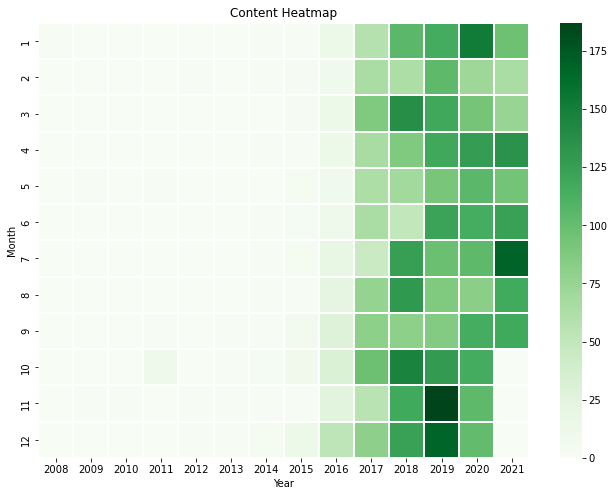

In [65]:
#Correlation between the features
month_year_df = df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="Greens")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

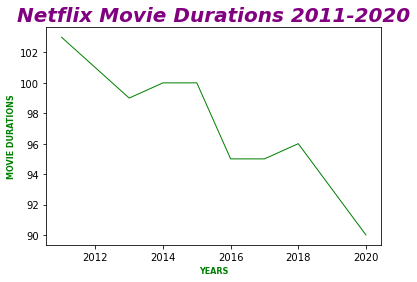

In [66]:
# Create the years and durations lists
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {'years': years, 'durations': durations}

line =plt.plot(years, durations , linewidth = 1 , color='g')


plt.title('Netflix Movie Durations 2011-2020',fontsize = 20,style='italic',weight='bold',rotation=0,color='purple');
plt.xlabel('YEARS',fontsize = 8, weight = 'bold',color='green');
plt.ylabel('MOVIE DURATIONS',fontsize = 8, weight = 'bold',color='green');


plt.show()

Text(0.5, 1.02, 'Persentage of Content Type')

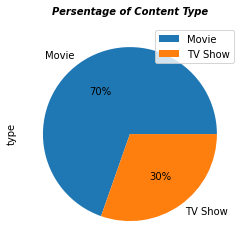

In [70]:
#plot Pie chart to show the percentage of content type
df['type'].value_counts().plot(kind='pie', autopct='%1.0f%%', legend=dict(x=0.1, y=1.1))
plt.title("Persentage of Content Type", y=1.02 , fontsize = 10,style='italic',weight='bold',rotation=0)

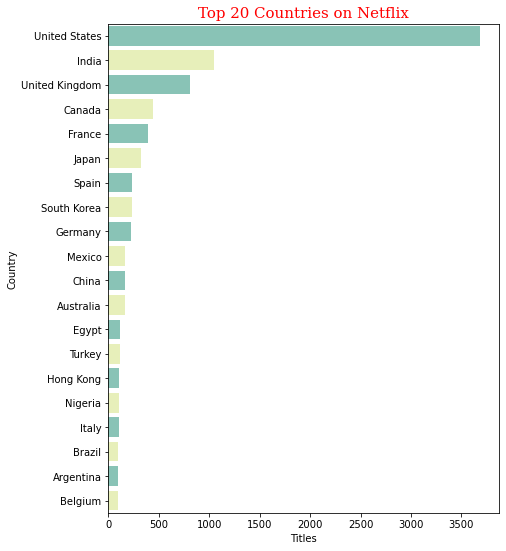

In [71]:
data = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = data, order=data.value_counts().index[:20] , palette= ["#7fcdbb","#edf8b1"])
plt.title('Top 20 Countries on Netflix' , family='serif',fontsize = 15,loc='center',color='r');
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

In [26]:
#How does the timeline look like for the addition of International Movies compared to International TV Shows?
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

X1 = d1[col].value_counts().reset_index()
X1 = X1.rename(columns = {col : "count", "index" : col})
X1['percent'] = X1['count'].apply(lambda x : 100*x/sum(X1['count']))
X1 = X1.sort_values(col)


Y2 = d2[col].value_counts().reset_index()
Y2 = Y2.rename(columns = {col : "count", "index" : col})
Y2['percent'] = Y2['count'].apply(lambda x : 100*x/sum(Y2['count']))
Y2 = Y2.sort_values(col)


new_x = go.Scatter(x=X1[col], y=X1["count"], name="TV Shows", marker=dict(color="#EC7063"))
new_y = go.Scatter(x=Y2[col], y=Y2["count"], name="Movies", marker=dict(color="#1D8348"))
data = [new_x, new_y]
layout = go.Layout(title="Content added over the years",legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)

fig.show()

# Movie Recommendation

In [9]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')


#Initialze tf_matrix and fit into descreption column

tf_matrix = tfidf.fit_transform(df['description'])

#output the shape of tfidf_matrix
tf_matrix.shape


(8807, 18895)

In [14]:
#calculate Cosine similarity
cosine_sim = linear_kernel(tf_matrix, tf_matrix)

In [15]:
#convert all titles into series associated with movie index numbers
indice = pd.Series(df.index, index = df['title']).drop_duplicates()

In [16]:
indice

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64

In [19]:


#define Function that gets recommendations based on the cosine similarity score of movie titles
def recommendation(title, cosine_sim=cosine_sim):
    idx = indice[title]
    
    #Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    
    
      #Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    #Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    #return the top 10 similar movies
    return df['title'].iloc[movie_indices]

In [20]:
#show top Recommend Movie based what I print the title of movie
recommendation("Zubaan")

1568                                    Kalel, 15
1864             Kipo and the Age of Wonderbeasts
7230    Krish Trish and Baltiboy: Face Your Fears
5302                                  Little Evil
8473                                The Rainmaker
5916                                   My Own Man
128               Agatha Christie's Crooked House
522                                         Larva
2667                               Babamın Ceketi
6035                                A Flying Jatt
Name: title, dtype: object